## Cropping a domain
MuSpAn allows you to take a large domain and crop out a subset of it to form a new domain. This may be very useful when, for example, you want to restrict your focus to a specific area of your data, or if you want to see how some spatial metric varies across a large sample.

In this tutorial, we'll explore how we can trim a large domain down into a smaller one (or many smaller ones).

Let's start by loading in a domain, and making sure that it has some points and some shapes in it. We'll make the shapes using alpha shapes, so that our 'crypts' of A and B cells are represented with a boundary shape.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Architecture
Number of objects: 5991
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

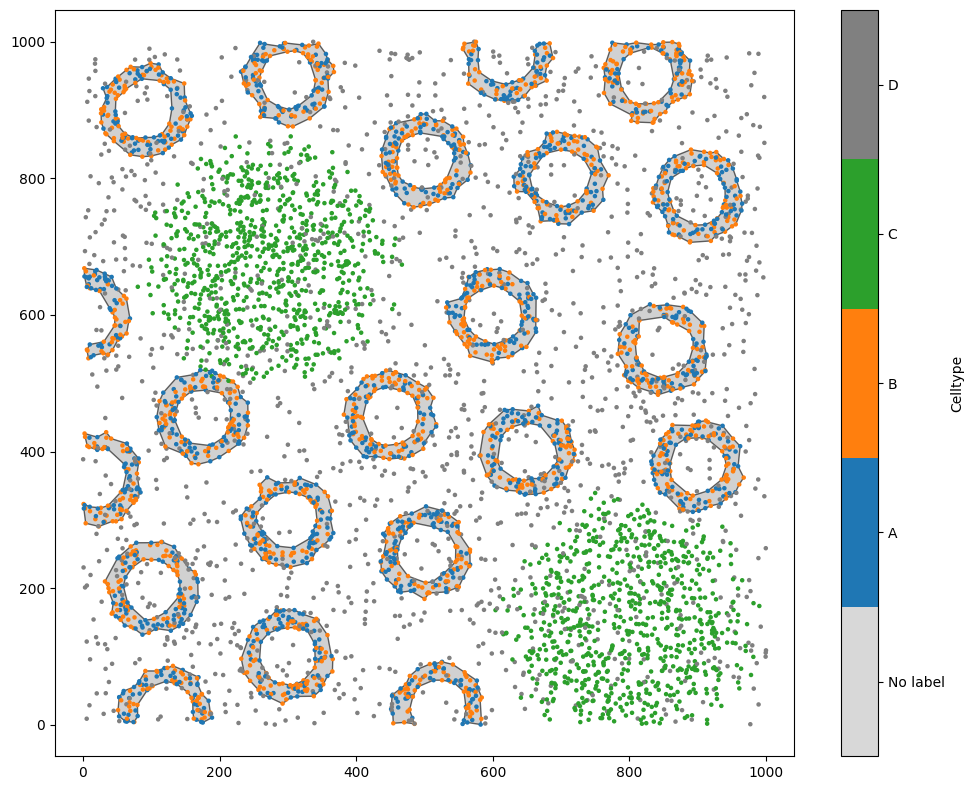

In [1]:
import muspan as ms
import matplotlib.pyplot as plt

# Load in a domain and make some ring shapes in it
domain = ms.datasets.load_example_domain('Synthetic-Points-Architecture')
type_A_cells = ms.query.query(domain,('label','Celltype'),'is','A')
type_B_cells = ms.query.query(domain,('label','Celltype'),'is','B')
rings = ms.query.query_container(type_A_cells,'OR',type_B_cells)
new_IDs = domain.convert_objects(rings,collection_name='New object',return_IDs=True,object_type='shape',conversion_method='alpha shape',conversion_method_kwargs=dict(alpha=20))

ms.visualise.visualise(domain,'Celltype',marker_size=5)

Let's use one of those new IDs to make a new domain containing all the points inside a specific crypt. We'll pick out one ID (object 5991, the first of the alpha shapes that we've just added) and see how it looks in the whole domain.

Text(0.5, 1.0, 'Object ID 5991')

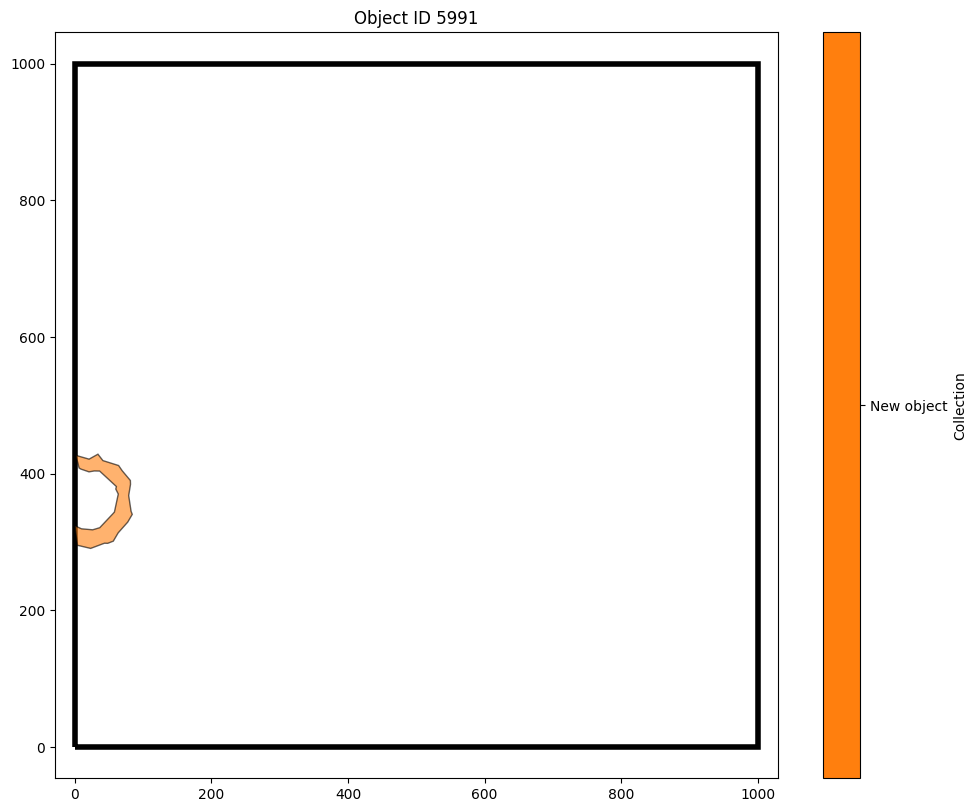

In [2]:
ms.visualise.visualise(domain,objects_to_plot=[new_IDs[0]],show_boundary=True)
plt.title(f'Object ID {new_IDs[0]}')

Great, we know which object ID 5991 is now. Now let's crop the domain down to that object.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

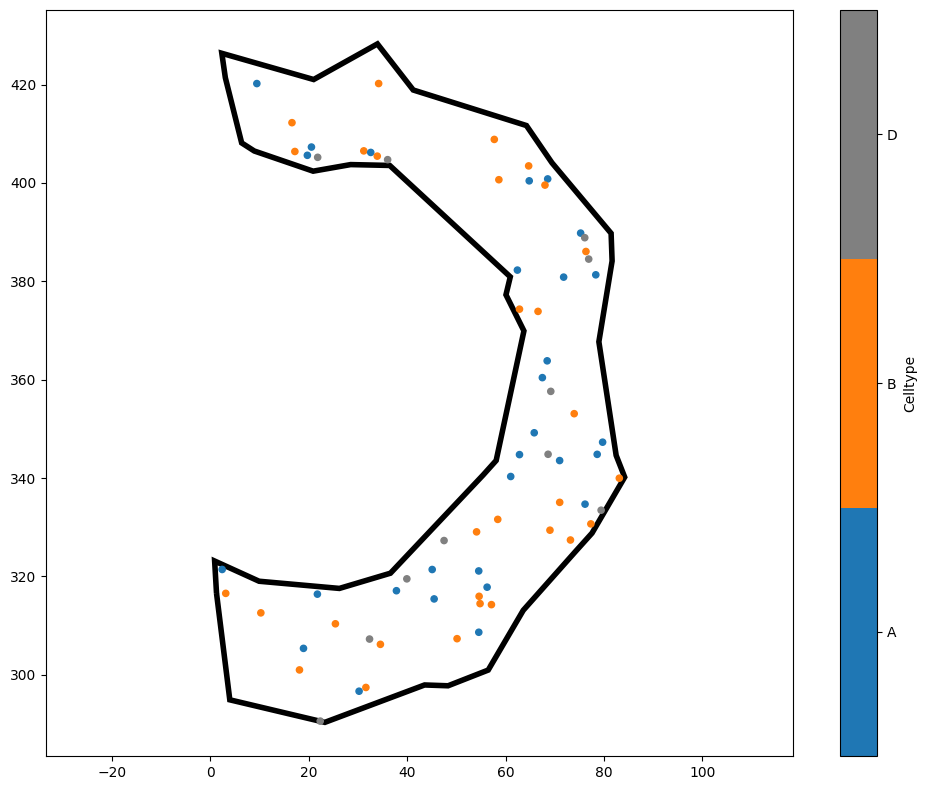

In [3]:
outputs = ms.helpers.crop_domain(domain, [5991])
tiny_domain = outputs[5991]
ms.visualise.visualise(tiny_domain,'Celltype',show_boundary=True)

There we have it - a brand new domain whose boundary matches the outside of the shape we just passed it. Notice a couple of things here. First, the labels in ``tiny_domain`` have been inherited from the big ``domain`` - we were able to colour the points by ``'Celltype'`` without any difficulty.

The other, potentially more misleading thing, is that ``crop_domain`` didn't immediately return a new domain - instead, it returned a dictionary that we called `outputs`, and we pulled our new domain out using the key `5991`. This might seem a strange syntax when you're cropping out a single domain, but makes much more sense if we crop out many different domains at once:

In [4]:
outputs = ms.helpers.crop_domain(domain, new_IDs)
print(outputs)
#ms.visualise.visualise(tiny_domain,'Celltype',show_boundary=True)

{np.int64(5991): <muspan.domain.domain object at 0x14b331bb0>, np.int64(5992): <muspan.domain.domain object at 0x14c558a40>, np.int64(5993): <muspan.domain.domain object at 0x14baa2750>, np.int64(5994): <muspan.domain.domain object at 0x14c10a7e0>, np.int64(5995): <muspan.domain.domain object at 0x14c3500e0>, np.int64(5996): <muspan.domain.domain object at 0x14c3d4dd0>, np.int64(5997): <muspan.domain.domain object at 0x14c1093d0>, np.int64(5998): <muspan.domain.domain object at 0x14b51f710>, np.int64(5999): <muspan.domain.domain object at 0x14c352750>, np.int64(6000): <muspan.domain.domain object at 0x14b4d04d0>, np.int64(6001): <muspan.domain.domain object at 0x14c3d6390>, np.int64(6002): <muspan.domain.domain object at 0x14c018650>, np.int64(6003): <muspan.domain.domain object at 0x14c1bb680>, np.int64(6004): <muspan.domain.domain object at 0x14c3d4d70>, np.int64(6005): <muspan.domain.domain object at 0x14b245b50>, np.int64(6006): <muspan.domain.domain object at 0x14c56de50>, np.int6

`outputs` now contains a dictionary of 21 domains, corresponding to the 21 IDs in the list of new_IDs. In general, we don't have to pass specific object IDs here - any query like object that returns some shapes will result in a new domain for each shape.

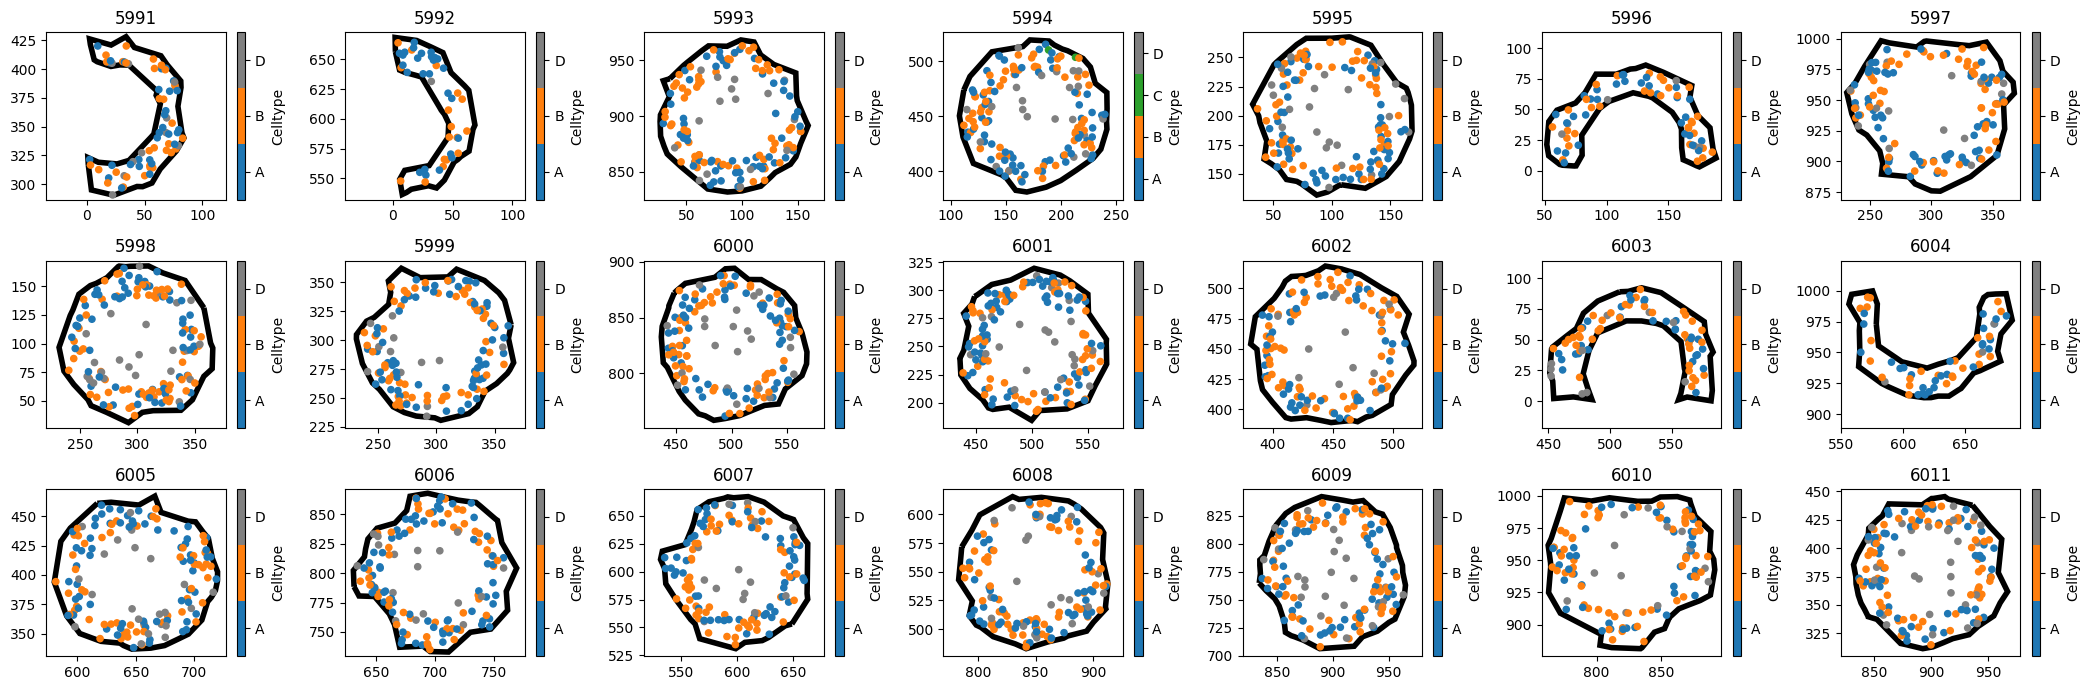

In [5]:
fig, axes = plt.subplots(nrows=3,ncols=7,figsize=(21,7))
i, j = (0,0)
for key in outputs:
    this_domain = outputs[key]
    ms.visualise.visualise(this_domain,'Celltype',ax=axes[j,i],show_boundary=True)
    axes[j,i].set_title(key)
    i = i + 1
    if i > 6:
        i = 0
        j = j + 1


A situation where we might be interested in cropping the domain is when we're using a lattice, for example. Let's add a hexagonal lattice to our original domain, and use it to crop out a single hexagon.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

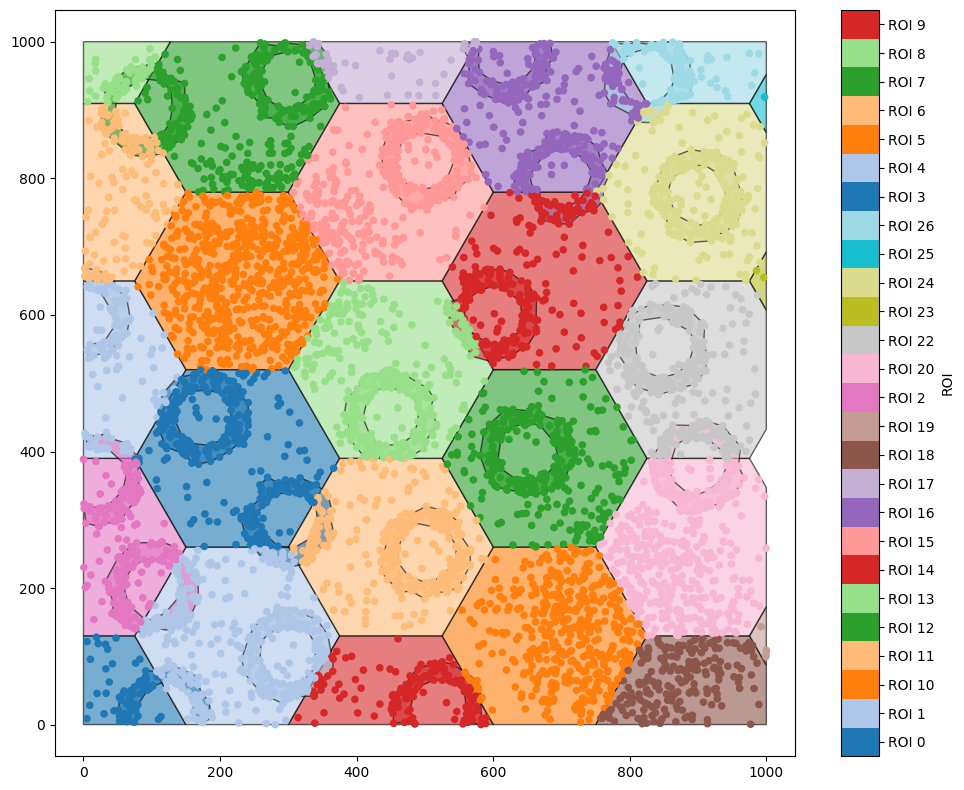

In [6]:
hex_IDs = ms.region_based.generate_hexgrid(domain,150)
ms.visualise.visualise(domain,'ROI')

`generate_hexgrid` has created hexagons with the label 'ROI'. Let's use a query to get the hexagon with ROI 14, and crop out a new domain with that as the boundary. Before we do, note that every object in ROI 14 has also been assigned this as a label - if we just get all the objects with ROI equal to 'ROI_14', we'll find a lot of objects.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

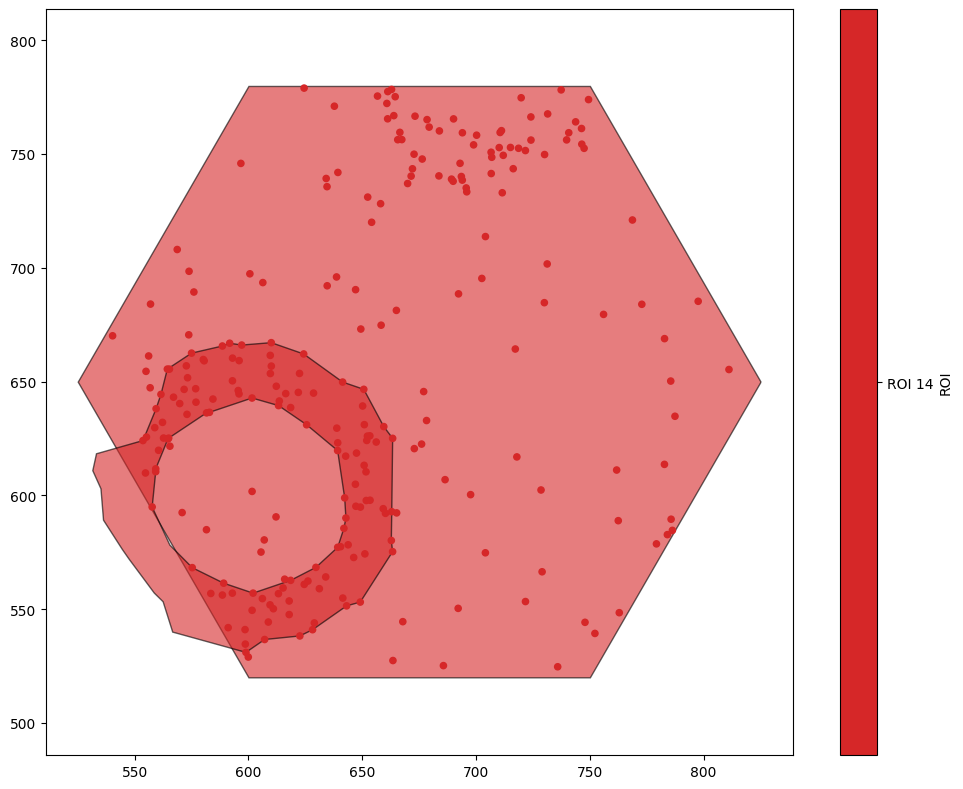

In [7]:
ms.visualise.visualise(domain,'ROI',objects_to_plot=('ROI','ROI 14'))

As a result, we'll use a more complex query to get the ID of the hexagon we're interested in.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

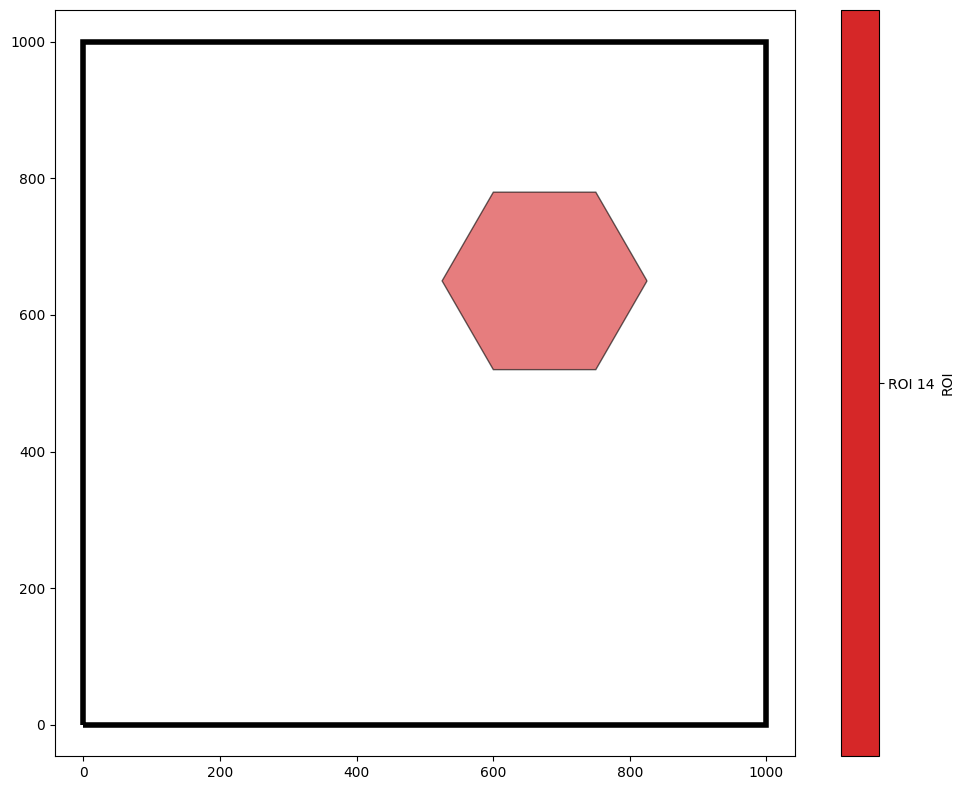

In [8]:
q14 = ms.query.query(domain,'ROI','is','ROI 14')
qHex = ms.query.query(domain,('collection',),'is','Hexgrid')
our_hexagon = q14 & qHex
ms.visualise.visualise(domain,'ROI',objects_to_plot=our_hexagon,show_boundary=True)

When cropping to this hexagon, we have a choice to make - the hexagon intersects with some of our crypt shapes. Do we want these shapes to be excluded from the new domain? Do we want to crop them? Do we want to expand the hexagon so that they're kept intact? Fortunately, MuSpAn allows us to choose which option we like best.

Method exclude - Area: 58456.71475544251
Method exclude - Number of objects: 252


Method clip - Area: 58456.71475544251
Method clip - Number of objects: 254


Method expand - Area: 69430.46238420677
Method expand - Number of objects: 254


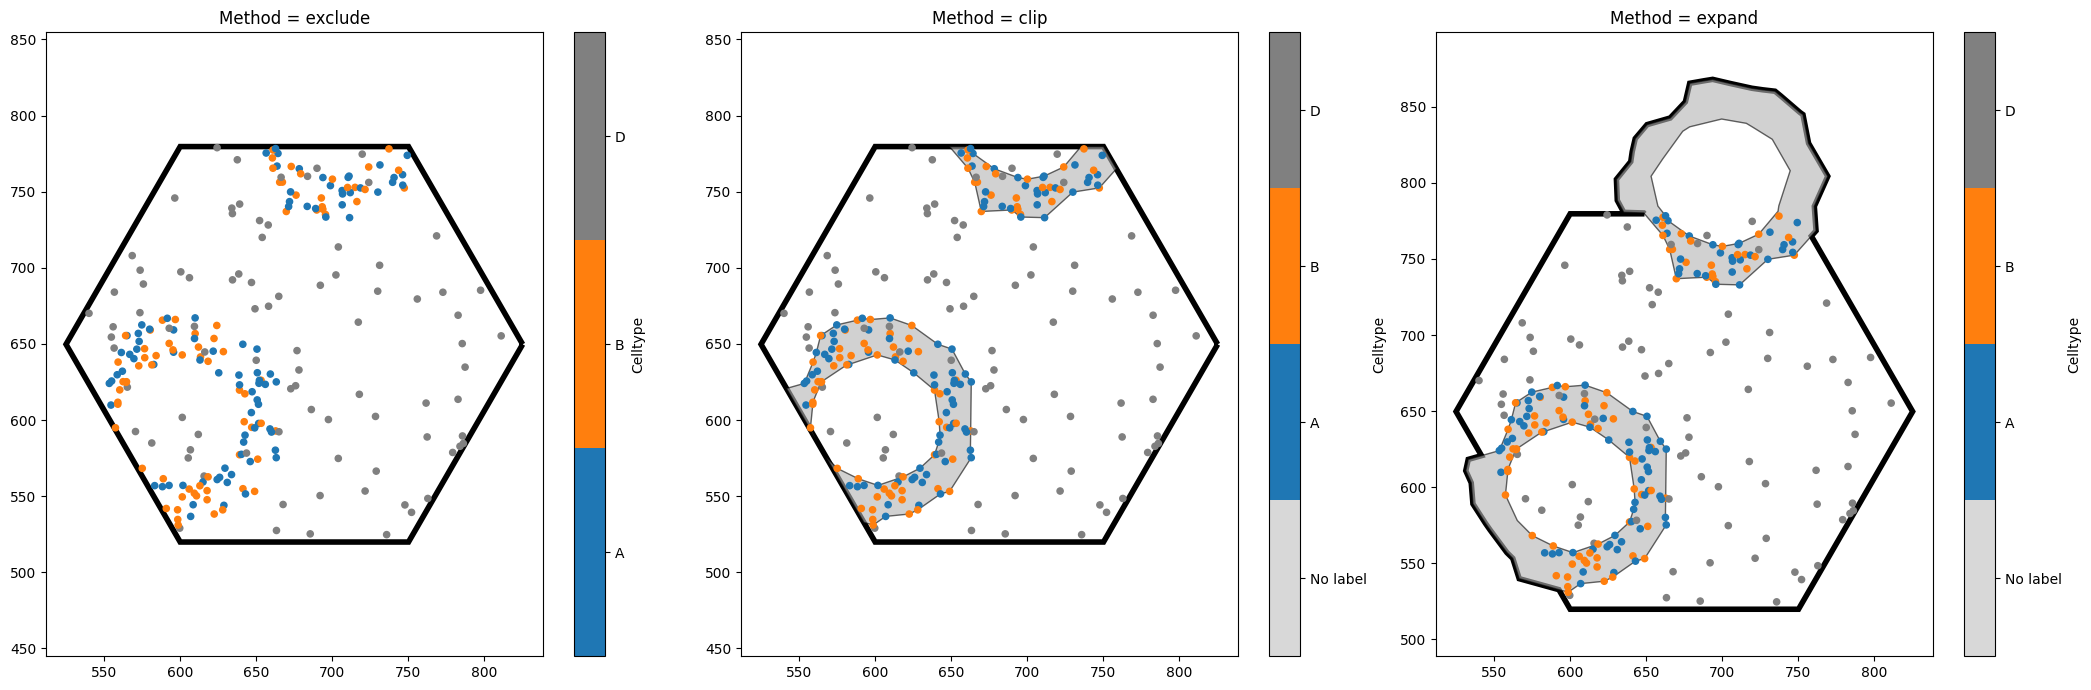

In [9]:
options = ['exclude','clip','expand']

fig, axes = plt.subplots(ncols=3,figsize=(21,7))
for i, option in enumerate(options):
    new_domain_dict = ms.helpers.crop_domain(domain, our_hexagon, handle_intersecting_objects=option)
    the_key = list(new_domain_dict.keys())[0]
    ms.visualise.visualise(new_domain_dict[the_key],'Celltype',ax=axes[i],show_boundary=True)
    axes[i].set_title(f'Method = {option}')
    print(f'Method {option} - Area: {new_domain_dict[the_key].boundary.area}')
    print(f'Method {option} - Number of objects: {new_domain_dict[the_key].n_objects}')

Notice the key differences between the three options. `exclude` is the strictest, and will completely discard any shape which intersects with the object boundary. By contrast, `clip` leads to a domain with the same area as `exclude`, but any objects intersecting with the boundary will be clipped (note that this may turn one object into many, if the clipped shape is no longer connected). Finally, `expand` is the most tolerant method, ensuring that all our shapes remain unaltered at the expense of increasing the domain area. The best method to choose will depend on your use case.

Finally, there is one more way of cropping to this hexagon. Notice that in the very red plot a few cells up (where we visualised all objects with the label `ROI` equal to `ROI 14`), only one of the two crypt shapes shown here was shown. This is because when we generate a hexgrid, objects are assigned a single label based on the region that their centroid is contained in. We can crop the domain to these objects immediately by specifying `crop_method='label'` in `crop_domain`.

In [10]:
new_domain_dict = ms.helpers.crop_domain(domain,crop_method='label',label_name='ROI')
print(new_domain_dict)

{np.str_('ROI 0'): <muspan.domain.domain object at 0x14bb10650>, np.str_('ROI 1'): <muspan.domain.domain object at 0x14cbecad0>, np.str_('ROI 10'): <muspan.domain.domain object at 0x14cf0e480>, np.str_('ROI 11'): <muspan.domain.domain object at 0x14d1a1fa0>, np.str_('ROI 12'): <muspan.domain.domain object at 0x14c5e5df0>, np.str_('ROI 13'): <muspan.domain.domain object at 0x14c08ff20>, np.str_('ROI 14'): <muspan.domain.domain object at 0x14cf0d700>, np.str_('ROI 15'): <muspan.domain.domain object at 0x14b332690>, np.str_('ROI 16'): <muspan.domain.domain object at 0x14b572e40>, np.str_('ROI 17'): <muspan.domain.domain object at 0x14d2d5970>, np.str_('ROI 18'): <muspan.domain.domain object at 0x14c2d8560>, np.str_('ROI 19'): <muspan.domain.domain object at 0x14d2d6270>, np.str_('ROI 2'): <muspan.domain.domain object at 0x14c3a0410>, np.str_('ROI 20'): <muspan.domain.domain object at 0x14b333410>, np.str_('ROI 22'): <muspan.domain.domain object at 0x14b1aa330>, np.str_('ROI 23'): <muspan.

This has used the ROI label to crop a new domain based on every possible value of the label `ROI`. This is in general substantially faster than repeatedly iterating over shapes and cropping to them. Cropping by label will find all shapes with the same value of that label, and create a new domain which encloses all of them. The new domain boundary is the convex hull around the points/shapes contained within that label.

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

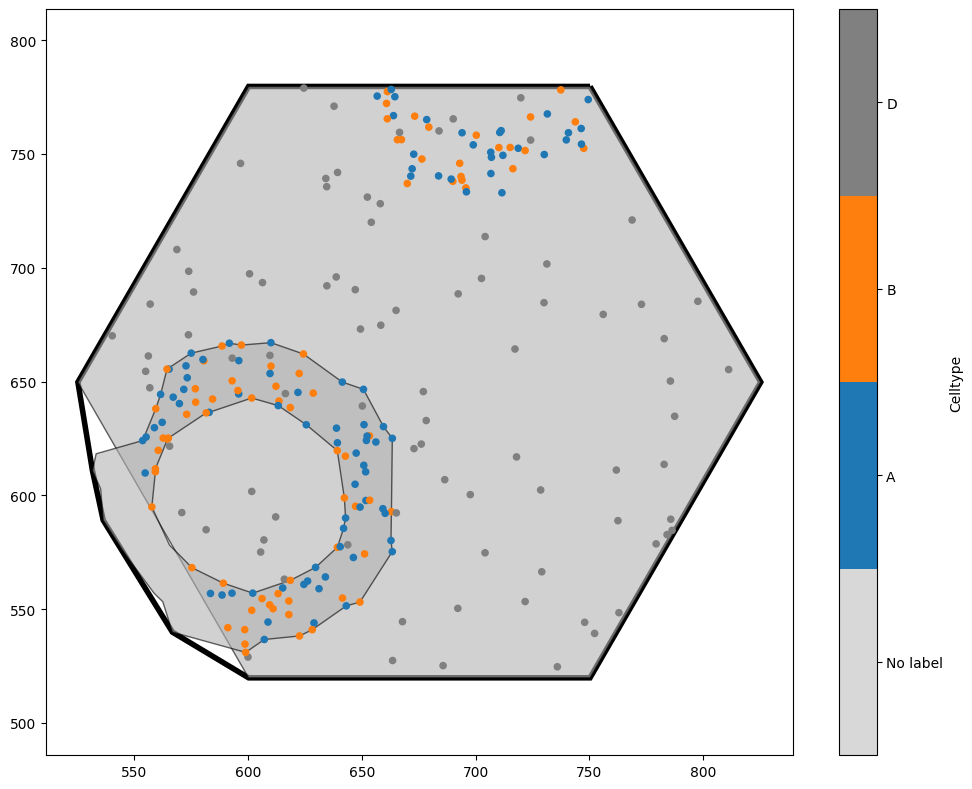

In [11]:
ms.visualise.visualise(new_domain_dict['ROI 14'],'Celltype',show_boundary=True)

In this example, because we generated a hexgrid which added new shapes to the domain, we've picked up a giant hexagon within our new domain! If we wanted, we could now delete this (remember that the hexagon is in a different collection to the other objects, which would make it straightforward to remove). This cropping functionality is extremely useful in situations where we have local neighbourhoods - for instance, if we had assigned each cell centre a neighbourhood ID (see, for instance, the 'Paper examples' tutorial for making Figure 5 of the MuSpAn paper). It means that we can crop objects out of our domain even without having a shape that defines the boundary we wish to crop to. As an example, let's make new domains which contains only points with the same cell type.

{np.str_('A'): <muspan.domain.domain object at 0x14b1a8fb0>, np.str_('B'): <muspan.domain.domain object at 0x14d1c1640>, np.str_('C'): <muspan.domain.domain object at 0x14d1f4e30>, np.str_('D'): <muspan.domain.domain object at 0x13e8ea750>}


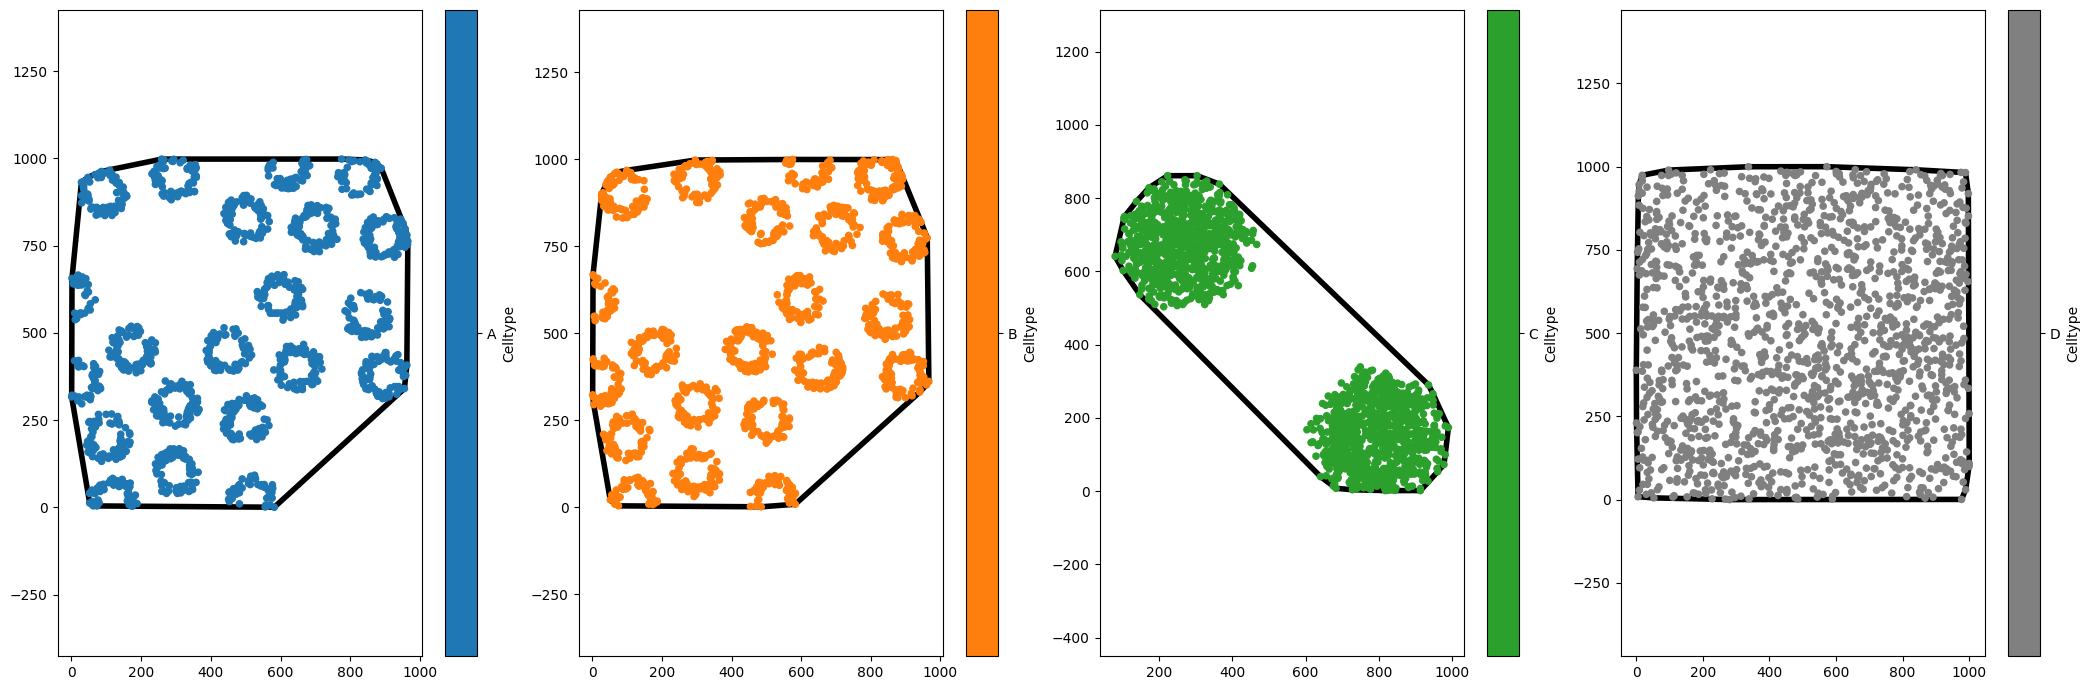

In [12]:
new_domain_dict = ms.helpers.crop_domain(domain,crop_method='label',label_name='Celltype')
print(new_domain_dict)

fig, axes = plt.subplots(ncols=4,figsize=(21,7))
for i, option in enumerate(['A','B','C','D']):
    ms.visualise.visualise(new_domain_dict[option],'Celltype',ax=axes[i],show_boundary=True)

Just for fun, let's see one of these plots again!

Method expand - Area: 69430.46238420677
Method expand - Number of objects: 254


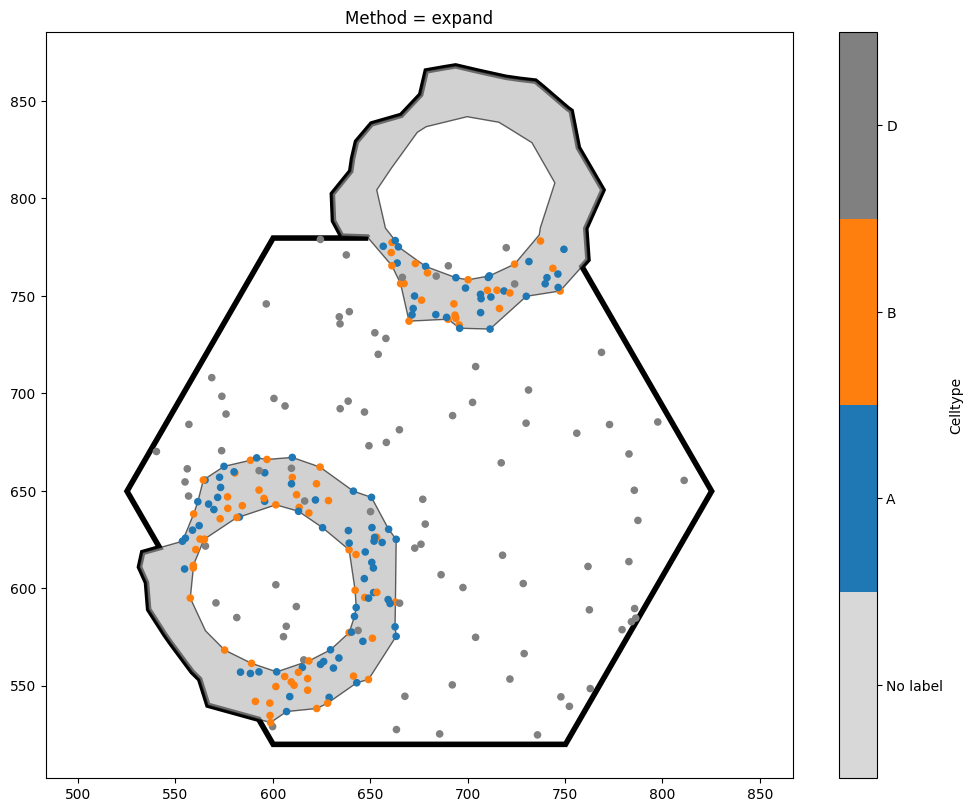

In [13]:
options = ['expand']
for i, option in enumerate(options):
    new_domain_dict = ms.helpers.crop_domain(domain, our_hexagon, handle_intersecting_objects=option)
    the_key = list(new_domain_dict.keys())[0]
    ms.visualise.visualise(new_domain_dict[the_key],'Celltype',show_boundary=True)
    plt.gca().set_title(f'Method = {option}')
    print(f'Method {option} - Area: {new_domain_dict[the_key].boundary.area}')
    print(f'Method {option} - Number of objects: {new_domain_dict[the_key].n_objects}')